In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing

In [50]:
x1=np.random.uniform(0,1, 200)
x2 =np.random.uniform(0,1, 200)
datas = {'x1' : x1, 'x2' : x2}
df=pd.DataFrame(datas)
df['label'] = 'blue'
# Create the conditions for label to be orange
condition1 = 2*df['x1']+0.25-df['x2']>0
condition2 = -2*df['x1']+2-df['x2']>0
df.loc[condition1 & condition2, 'label'] = 'orange'


In [51]:
df

,x1,x2,label
0,0.889674,0.554024,blue
1,0.257962,0.685747,orange
2,0.516760,0.190046,orange
3,0.914451,0.483820,blue
4,0.527175,0.128347,orange
...,...,...,...
195,0.481631,0.151752,orange
196,0.532023,0.241506,orange
197,0.789374,0.149335,orange
198,0.260306,0.905313,blue


In [52]:
# Noise
n1 = np.random.uniform(-0.1, 0.1, 200)
n2 = np.random.uniform(-0.1, 0.1, 200)
Noise = pd.DataFrame({'N1' : n1, 'N2' : n2})
df['x1'] = df['x1'] + Noise['N1']
df['x2'] = df['x2'] + Noise['N2']

In [53]:
Noise

,N1,N2
0,0.088323,-0.071103
1,0.009356,0.073129
2,0.083036,0.076025
3,0.019318,0.046851
4,-0.087783,-0.048626
...,...,...
195,-0.087393,-0.007705
196,0.009131,0.061934
197,-0.080148,-0.076169
198,-0.076917,0.025333


(0.0, 1.2)

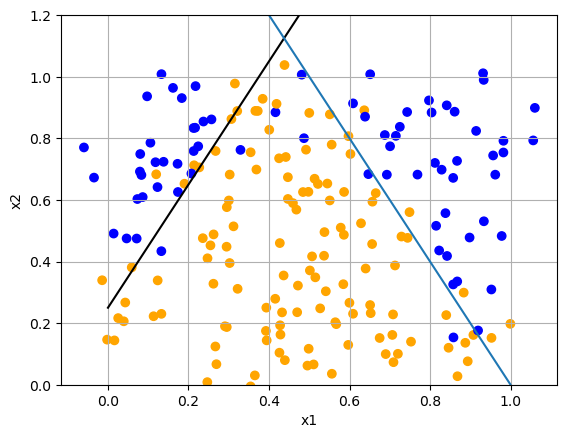

In [54]:
plt.scatter(df['x1'], df['x2'], c=df['label'])  # 'c' parameter sets the color based on the 'Color' column
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
x1_line = np.linspace(0, 1, 100)
x2_line = 2 * x1_line + 0.25
x22_line = -2 * x1_line + 2
plt.plot(x1_line, x2_line, label='x2 = 2*x1 + 0.25', color='black')
plt.plot(x1_line, x22_line, label='x2 = −2x + 2')
plt.ylim(0, 1.2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


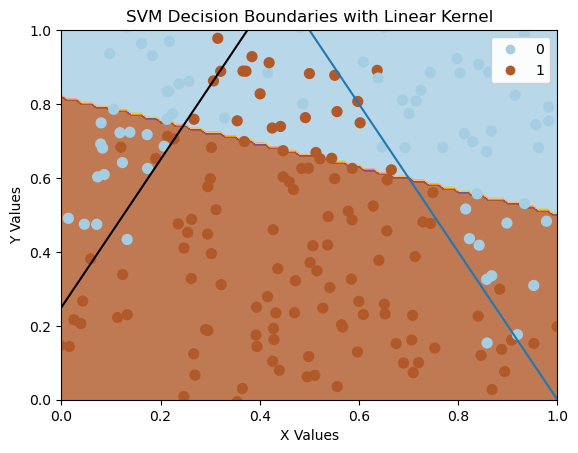

In [55]:
# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
X = pd.concat([df['x1'], df['x2']], axis = 1)

# Encode label column
le=preprocessing.LabelEncoder().fit(df["label"])
df['label'] = le.transform(df['label'])
Y=df['label']



clf.fit(X, Y)
h=0.02

# Define the range and step size for the mesh grid
x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict labels for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot for data points
scatter = plt.scatter(X['x1'], X['x2'], c=Y, cmap=plt.cm.Paired, s=50, marker='o')

x1_line = np.linspace(0, 1, 100)
x2_line = 2 * x1_line + 0.25
x22_line = -2 * x1_line + 2
plt.plot(x1_line, x2_line, label='x2 = 2*x1 + 0.25', color='black')
plt.plot(x1_line, x22_line, label='x2 = −2x + 2')

# Add labels and a title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.ylim(0,1)
plt.xlim(0,1)
plt.title('SVM Decision Boundaries with Linear Kernel')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), loc="upper right")
plt.gca().add_artist(legend)

# Show the plot
plt.show()